<a href="https://colab.research.google.com/github/AnaClarice382/deep-learning/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
fashion_mnist = tensorflow.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
def normalize(x,m,s):
    return (x - train_mean) / train_std

train_mean = X_train.mean()
train_std = X_train.std()

X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)

In [4]:
print(f'Training Mean after standardization {X_train.mean():.3f}')
print(f'Training Std after standardization {X_train.std():.3f}')
print(f'Test Mean after standardization {X_test.mean():.3f}')
print(f'Test Std after standardization {X_test.std():.3f}')

Training Mean after standardization -0.000
Training Std after standardization 1.000
Test Mean after standardization 0.002
Test Std after standardization 0.998


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 13s 3ms/step - loss: 0.4497 - accuracy: 0.8377 - val_loss: 0.3862 - val_accuracy: 0.8614
Epoch 2/2
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.8713 - val_loss: 0.3758 - val_accuracy: 0.8656


In [6]:
X_train = X_train.reshape((len(X_train), 28, 28,1))
X_test = X_test.reshape((len(X_test), 28, 28,1))

In [7]:
num_classes = len(set(y_train))
img_height=28
img_width=28
channels=1

Teste usando rede lenet5

In [8]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3, monitor='val_loss')

#teste com lenet5
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, channels)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/50
1875/1875 [==============================] - 15s 5ms/step - loss: 0.5293 - accuracy: 0.8044 - val_loss: 0.3963 - val_accuracy: 0.8552
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3552 - accuracy: 0.8709 - val_loss: 0.3611 - val_accuracy: 0.8642
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3140 - accuracy: 0.8831 - val_loss: 0.3237 - val_accuracy: 0.8821
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2872 - accuracy: 0.8937 - val_loss: 0.3126 - val_accuracy: 0.8818
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9008 - val_loss: 0.3254 - val_accuracy: 0.8752
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2514 - accuracy: 0.9057 - val_loss: 0.2953 - val_accuracy: 0.8907
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2364 - accuracy: 0.9116 - val_loss: 0.2916 - val_accuracy

In [56]:
import pandas as pd
df = pd.DataFrame()

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}



out = model.predict(X_test)

max_indices = np.argmax(out, axis=1)

mapped_labels = [label_names[index] for index in max_indices]
true_labels =  [label_names[index] for index in y_test]

df['y_true'] = true_labels
df['predict'] = mapped_labels

313/313 [==============================] - 1s 2ms/step


O out possui 1000 registros por 10 colunas, colunas essas que sao a probabilidade em cada classe

In [60]:
df[(df['y_true'] != df['predict'])].index[:10]

Int64Index([12, 23, 32, 42, 48, 49, 50, 57, 67, 68], dtype='int64')

Visualizando as predicoes que o modelo errou

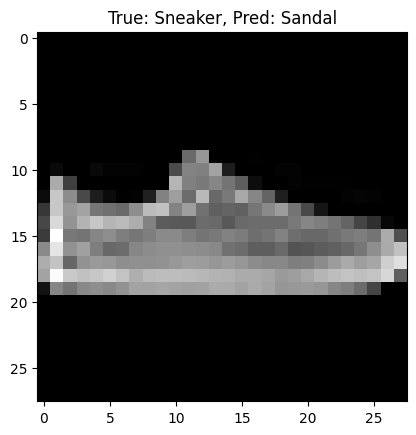

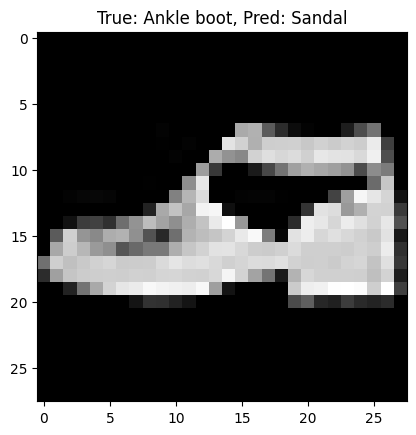

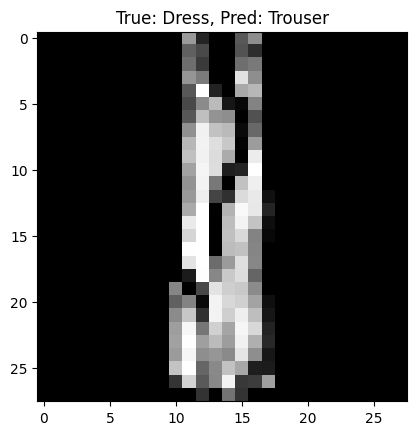

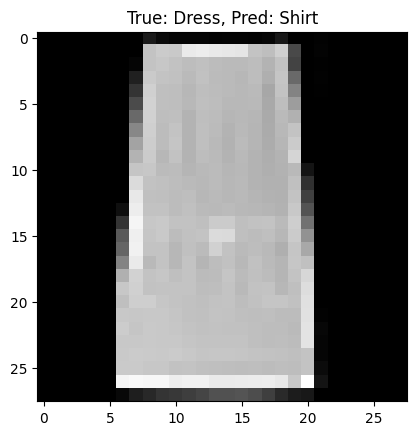

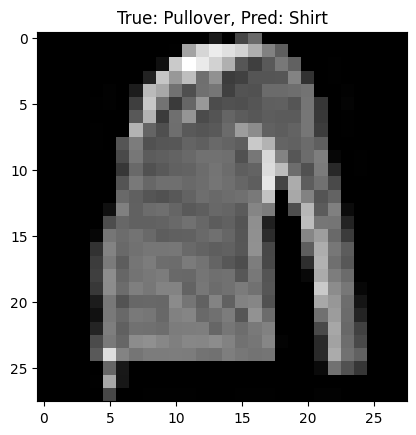

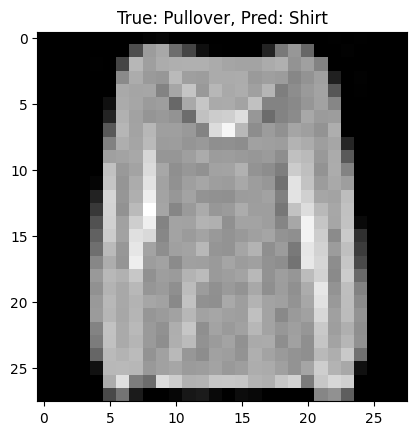

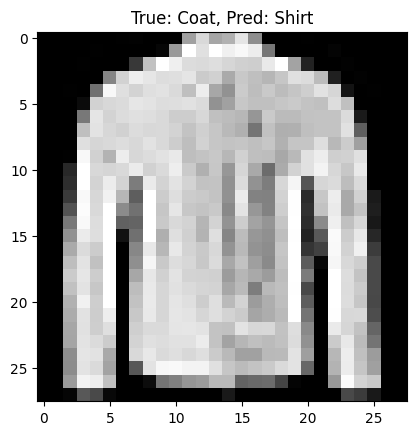

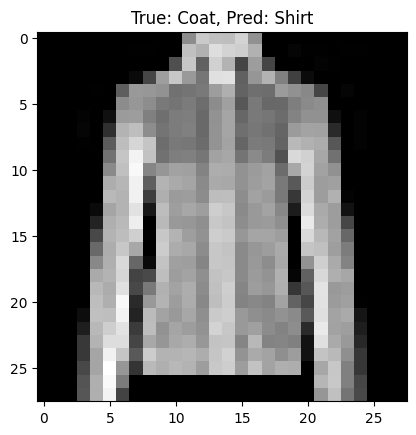

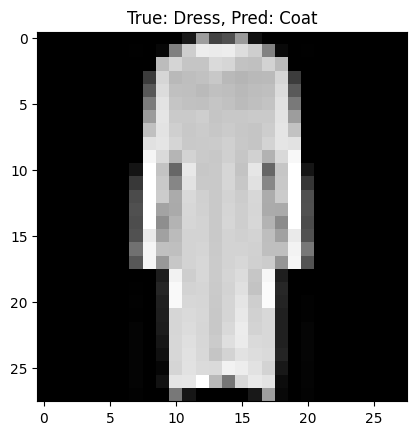

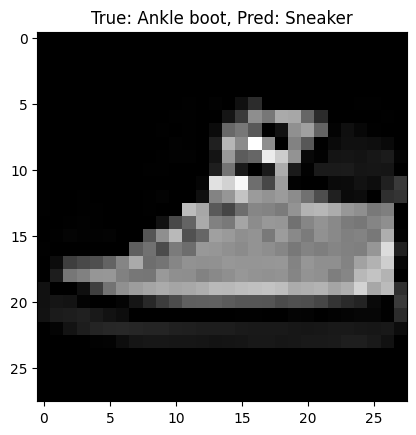

In [61]:
import numpy as np
import matplotlib.pyplot as plt

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in df[(df['y_true'] != df['predict'])].index[:10]:
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')

    plt.title("True: {}, Pred: {}".format(df['y_true'][idx], df['predict'][idx]))
    plt.show()

Dá para entender por que o modelo erra em alguns casos, alguns casos é dificil até para nós entendermos a diferenca, nesse caso, sandalha com sapato, nessa resolucao é algo que facilmente pode ser confundido.